In [25]:
#https://medium.com/swlh/product-sales-analysis-using-python-863b29026957
#import pandas libary
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

## How to read file csv in pandas

In [4]:
#path = ('/Users/haleynguyen/Desktop/Learn Python/sales2019.csv') -- Absolute Path - another Folder
#path = ('sales2019.csv') -- Relative Path - Same Folder
#How to read file csv with pandas
path = ('sales2019.csv')
dataframe = pd.read_csv(path)
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


### How to merge file in pandas

In [5]:
df = pd.concat(map(pd.read_csv, ['sales2019_1.csv', 'sales2019_2.csv','sales2019_3.csv']), ignore_index=True)
df.to_csv('Merge_file.csv') #Create file csv with the result

### Add 'Month' is a new column

In [6]:
path = ('Merge_file.csv')
dataframe = pd.read_csv(path)
dataframe['Month'] = dataframe['Order Date'].str.slice(0,2,1) #Slice string
print(set(dataframe['Month'])) #Print set of values of column


{nan, '04', 'Or', '01', '02', '03'}


### Get and delete some values unwanted 'nan', 'Or'

In [7]:
dataframe = dataframe.dropna() 
dataframe.head()
print(set(dataframe['Month']))

{'04', 'Or', '01', '02', '03'}


In [8]:
#df[df['Month'] == 'Or'] #Check some info of column
dataframe = dataframe[dataframe['Month'] != 'Or']
print(set(dataframe['Month']))


{'01', '04', '02', '03'}


## Reporting

### 1. Which month have most revenue?

In [9]:
dataframe['Quantity Ordered'] = pd.to_numeric(dataframe['Quantity Ordered']) #Convert object to numeric 
#print(dataframe['Quantity Ordered'].dtypes) => Check type of column
dataframe['Price Each'] = pd.to_numeric(dataframe['Price Each'])
dataframe['Revenue'] = dataframe['Quantity Ordered'] * dataframe['Price Each']
dataframe

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99
...,...,...,...,...,...,...,...,...,...
36980,36980,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",03,14.95
36981,36981,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",03,149.99
36982,36982,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",03,8.97
36983,36983,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",03,700.00


In [10]:
dataframe.groupby(by=['Month']).sum()['Revenue'] #Get revenue group by Month

Month
01    1813586.44
02    2202022.42
03    2807100.38
04       5170.42
Name: Revenue, dtype: float64

In [11]:
sale_revenue = dataframe.groupby(by=['Month']).sum()['Revenue']
sale_revenue
print(f'{sale_revenue.idxmax()} is month have most revenue is: {sale_revenue.max()}')


03 is month have most revenue is: 2807100.38


### 2. Which month have most revenue?

In [12]:
# Split after Comma - dau phay
# new_data = dataframe['Purchase Address'].str.split(',', n = 2, expand = True)
# city = new_data[1]

# Function get city name
# def getCity(sample_Adrress):
#     return sample_Adrress.split(',')[1]

# Funtion with lambda
getNameCity = lambda address: address.split(',')[1]


In [13]:
dataframe['City'] = dataframe['Purchase Address'].apply(getNameCity)
dataframe.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City
0,0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00,Boston
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95,Portland
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99,Austin


In [14]:
revenueByCity  = dataframe.groupby(by=['City']).sum()['Revenue'] #Get revenue group by city
revenueByCity.max()

1673905.74

In [15]:
#Get uni or set of column
# cities = dataframe['City'].unique()
# cities = set(dataframe['Month'])
# Nhưng truyền cities vào như hai cách trên là sẽ gây ra lỗi là trục x không trùng khớp với kết quả như trong groupby
# Do đó cách tốt nhất là lấy kết quả từ trong dữ liệu sau khi group by luôn

# cities = []
# for city, revenue in revenueByCity.items():
#     cities.append(city)

# How to write faster, how to loop through pandas
cities = [city for city, revenue in revenueByCity.items()]
print(cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


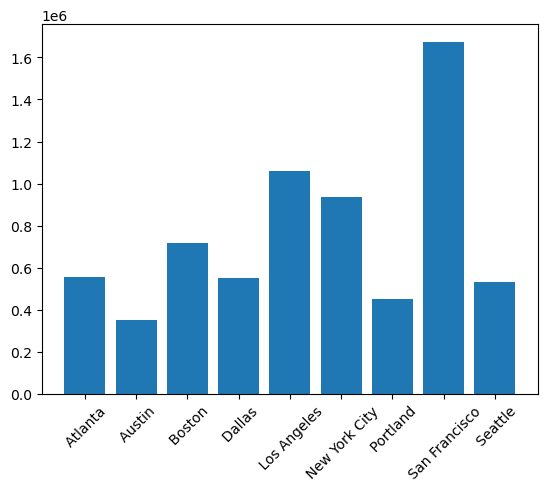

In [16]:
months = range(1,3)
plt.bar(x=cities, height=revenueByCity)
plt.xlabel = 'City'
plt.ylabel = 'Revenue'
plt.xticks(cities, rotation = 45)
plt.show()

### 3. What time should we display ads to maximize the likelihood of customer's buying product?

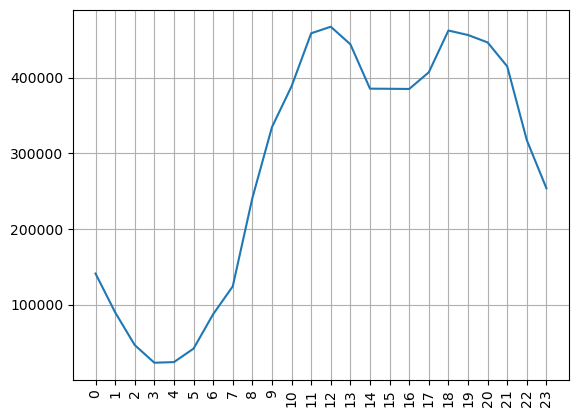

In [17]:
# Convert type to date
dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'])
dataframe['Hour'] = dataframe['Order Date'].dt.hour

revenueByHours = dataframe.groupby(by=['Hour']).sum()['Revenue'] #Get revenue group by Hours

hours = [hours for hours, revenue in revenueByHours.items()]

months = range(1,3)
plt.plot(hours, revenueByHours) #Get line chart
plt.grid()
plt.xlabel = 'Hours'
plt.ylabel = 'Revenue'
plt.xticks(hours, rotation = 90)
plt.show()

###   Count order not by sale

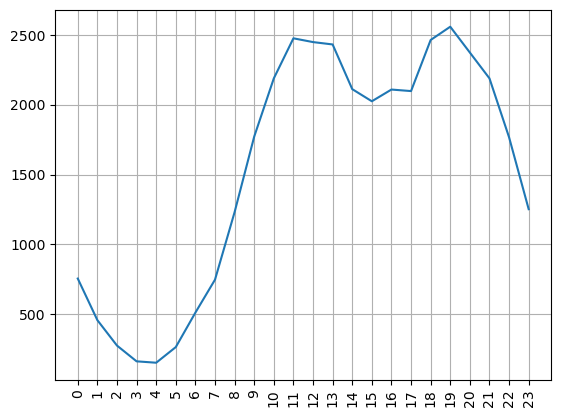

In [18]:
# Convert type to date
dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'])
dataframe['Hour'] = dataframe['Order Date'].dt.hour

revenueByHours = dataframe.groupby(by=['Hour']).count()['Revenue'] #Get revenue group by Hours

hours = [hours for hours, revenue in revenueByHours.items()]

months = range(1,3)
plt.plot(hours, revenueByHours) #Get line chart
plt.grid()
plt.xlabel = 'Hours'
plt.ylabel = 'Revenue'
plt.xticks(hours, rotation = 90)
plt.show()

### 4. What products are most sold together?

In [19]:
#Find duplicate productID in one order
df_dup = dataframe[dataframe.duplicated(keep=False, subset=['Order ID'])]
df_dup.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour
41,41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
42,42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
57,57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8
58,58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,8
133,133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11


In [20]:
# dataframe['All_Product'] = df_dup.groupby('Order ID')['Product'].apply(groupProduct).reset_index()
# Không thể sử dụng apply() bởi vì khi sử dụng nó sẽ trả về một Dataframe 
# Nhưng chúng ta đang cần trả về một series vì vậy nên đổi từ apply() sang transfrorm)()
groupProduct = lambda product: ', '.join(product)
df_dup['All_Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

df_dup[['Order ID','All_Product']].drop_duplicates

/var/folders/zj/4sljh7px3ns7lyllfwp8zffw0000gq/T/ipykernel_3595/3801183561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All_Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


<bound method DataFrame.drop_duplicates of       Order ID                                        All_Product
41      141275             USB-C Charging Cable, Wired Headphones
42      141275             USB-C Charging Cable, Wired Headphones
57      141290    Apple Airpods Headphones, AA Batteries (4-pack)
58      141290    Apple Airpods Headphones, AA Batteries (4-pack)
133     141365                  Vareebadd Phone, Wired Headphones
...        ...                                                ...
36912   176487                   iPhone, Lightning Charging Cable
36962   176537  Apple Airpods Headphones, Apple Airpods Headph...
36963   176537  Apple Airpods Headphones, Apple Airpods Headph...
36983   176557                   iPhone, Lightning Charging Cable
36984   176557                   iPhone, Lightning Charging Cable

[2918 rows x 2 columns]>

In [21]:
# df_dup['All_Product'].value_counts().head(10)
df_dup['All_Product'].explode('All_Product').value_counts()

Google Phone, USB-C Charging Cable           380
iPhone, Lightning Charging Cable             354
iPhone, Wired Headphones                     162
Google Phone, Wired Headphones               128
Vareebadd Phone, USB-C Charging Cable        116
                                            ... 
27in FHD Monitor, LG Dryer                     2
Lightning Charging Cable, ThinkPad Laptop      2
Flatscreen TV, AA Batteries (4-pack)           2
Flatscreen TV, 34in Ultrawide Monitor          2
AAA Batteries (4-pack), 20in Monitor           2
Name: All_Product, Length: 240, dtype: int64

In [22]:
df_dup = df_dup[['Order ID','All_Product']].drop_duplicates()
df_dup.head()

,Order ID,All_Product
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"


In [80]:
# df_dup_result = df_dup['All_Product'].str.rsplit(",", n=1, expand=True)
# df_dup_result.value_counts()
count_items = Counter()

for row in df_dup['All_Product']: 
    row_split = row.split(',')
    # count.update(Counter(combinations(row_split,2)))
    count_items.update(Counter(combinations(row_split,3)))

# count_items.most_common(10)
#Convert to dataframe
df = pd.DataFrame.from_dict(count_items, orient='index').reset_index()
df = df.rename(columns={'index':'ProductName', 0:'Quantity'})
df


,ProductName,Quantity
0,"(iPhone, Apple Airpods Headphones, Wired Hea...",4
1,"(Vareebadd Phone, USB-C Charging Cable, Wire...",9
2,"(Google Phone, Bose SoundSport Headphones, W...",3
3,"(Google Phone, USB-C Charging Cable, Wired H...",16
4,"(iPhone, Lightning Charging Cable, Apple Air...",7
5,"(iPhone, Lightning Charging Cable, Wired Hea...",10
6,"(Google Phone, USB-C Charging Cable, Bose So...",12
7,"(Google Phone, USB-C Charging Cable, AA Batt...",2
8,"(Google Phone, USB-C Charging Cable, Apple A...",1
9,"(iPhone, Lightning Charging Cable, iPhone)",1
